In [1]:
#%pylab inline
#import pandas as pd
import numpy as np
import math
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.cm as cm
#from scipy.io import FortranFile
#from skimage import measure
#from mpl_toolkits.mplot3d import Axes3D
#from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
modelfile='Jezero_Mars2020_Ls60-S-g07.nc'
mf=Dataset(modelfile,model='r')
#glon = mf.variables['glon'][:]
#glat =mf.variables['glat'][:]
u=mf.variables['u_avg'][0:723,:,:,:]
v=mf.variables['v_avg'][0:723,:,:,:]
theta=mf.variables['theta'][0:723,:,:,:]
z_lyrbnd_AGL=mf.variables['z_lyrbnd_AGL'][0:723,:,:,:]
z_lyrmid_AGL=mf.variables['z_lyrmid_AGL'][0:723,:,:,:]
#lat=glat[0,:,:]
#lon=glon[0,:,:]

In [4]:
xmin=0
xmax=theta.shape[2]
ymin=0
ymax=theta.shape[1]
zlev=theta.shape[3]
tmax=theta.shape[0]

deltaz=np.zeros((tmax,ymax,xmax,zlev))
speed=np.zeros((tmax,ymax,xmax,zlev))
delspeed=np.zeros((tmax,ymax,xmax,zlev))
shear=np.zeros((tmax,ymax,xmax,zlev))
ri=np.zeros((tmax,ymax,xmax,zlev))
gdln0dz=np.zeros((tmax,ymax,xmax,zlev))
brunt=np.zeros((tmax,ymax,xmax,zlev))

time1=364
time2=388
time3=412
time4=436
time5=460
time6=484
x2020=52
y2020=87
for k in range(1,zlev): 
    deltaz[364:711,:,:,k-1]=z_lyrmid_AGL[364:711,:,:,k]-z_lyrmid_AGL[364:711,:,:,k-1]
    speed[364:711,:,:,k]=np.sqrt(u[364:711,:,:,k]**2+v[364:711,:,:,k]**2)
    shear[364:711,:,:,k-1]=delspeed[364:711,:,:,k-1]/deltaz[364:711,:,:,k-1]
    delspeed[364:711,:,:,k-1]=np.sqrt(u[364:711,:,:,k]**2+v[364:711,:,:,k]**2)-np.sqrt(u[364:711,:,:,k-1]**2+v[364:711,:,:,k-1]**2)
    shear[364:711,:,:,k-1]=delspeed[364:711,:,:,k-1]/deltaz[364:711,:,:,k-1]
    gdln0dz[364:711,:,:,k-1]= 3.72*(np.log(theta[364:711,:,:,k])-np.log(theta[364:711,:,:,k-1]))/deltaz[364:711,:,:,k-1]
    brunt[364:711,:,:,k-1]= np.sqrt(3.72*(np.log(theta[364:711,:,:,k])-np.log(theta[364:711,:,:,k-1]))/deltaz[364:711,:,:,k-1])
    ri[364:711,:,:,k-1]=gdln0dz[364:711,:,:,k-1]/(np.maximum(shear[364:711,:,:,k-1]**2,1.e-10))


In [4]:
print("Ri diurnal cycle",ri[424:711,y2020,x2020,1])
print()

In [5]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
#let's zoom in on the lowest levels
#Let's plot all the Ri over the average range of x
plt.xlabel("Richardson number")
plt.ylabel("Height above surface (m)")
#Using a log10 scale for richardson number
#Ri can get very large if shear is small
plt.xscale('linear')
#xlim de agosto2022
#plt.xlim([-30000,55000])
plt.xlim([-1000,1000])
#plt.xticks(range(0,2,1))   
for t in range(time1,time2):
    varx=np.average(ri[time1:time2,y2020,x2020,1:14],axis=0)
    vary=np.average(z_lyrbnd_AGL[time1:time2,y2020,x2020,1:14],axis=0)
    plt.scatter(varx,vary,marker='^',color='black',linewidth=0.1)
    plt.plot(varx,vary,color='black',linewidth=0.1)
for t in range(time2,time3):
    varx=np.average(ri[time2:time3,y2020,x2020,1:14],axis=0)
    vary=np.average(z_lyrbnd_AGL[time2:time3,y2020,x2020,1:14],axis=0)
    plt.scatter(varx,vary,marker='.',color='red',linewidth=0.1)
    plt.plot(varx,vary,color='red',linewidth=0.1)
for t in range(time3,time4):
    varx=np.average(ri[time3:time4,y2020,x2020,1:14],axis=0)
    vary=np.average(z_lyrbnd_AGL[time3:time4,y2020,x2020,1:14],axis=0)
    plt.scatter(varx,vary,marker='^',color='green',linewidth=0.1)
    plt.plot(varx,vary,color='green',linewidth=0.1)
for t in range(time4,time5):
    varx=np.average(ri[time4:time5,y2020,x2020,1:14],axis=0)
    vary=np.average(z_lyrbnd_AGL[time4:time5,y2020,x2020,1:14],axis=0)
    plt.scatter(varx,vary,marker='.',color='blue',linewidth=0.1)
    plt.plot(varx,vary,color='blue',linewidth=0.1)
for t in range(time5,time6):
    varx=np.average(ri[time5:time6,y2020,x2020,1:14],axis=0)
    vary=np.average(z_lyrbnd_AGL[time5:time6,y2020,x2020,1:14],axis=0)
    plt.scatter(varx,vary,marker='^',color='magenta',linewidth=0.1)
    plt.plot(varx,vary,color='magenta',linewidth=0.1)
plt.grid()
title='Richardson number. Ls60'
plt.title(title)
resolution_value = 1200
plt.savefig("Ri_Ls60_full.png", format="png", dpi=resolution_value)

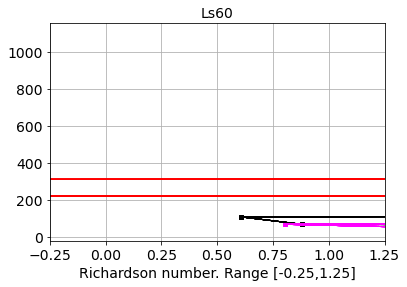

In [6]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
#let's zoom in on the lowest levels
#Let's plot all the Ri over the average range of x
plt.xlabel("Richardson number. Range [-0.25,1.25]")
#plt.ylabel("Height above surface (m)")
#Using a log10 scale for richardson number
#Ri can get very large if shear is small
plt.xscale('linear')
plt.xlim([-0.25,1.25])
#plt.xticks(range(0,2,1))   
for t in range(time1,time2):
    varx=np.average(ri[time1:time2,y2020,x2020,1:15],axis=0)
    vary=np.average(z_lyrbnd_AGL[time1:time2,y2020,x2020,1:15],axis=0)
    plt.scatter(varx,vary,marker='.',color='black',linewidth=2)
    plt.plot(varx,vary,color='black',linewidth=1)
for t in range(time2,time3):
    varx=np.average(ri[time2:time3,y2020,x2020,1:15],axis=0)
    vary=np.average(z_lyrbnd_AGL[time2:time3,y2020,x2020,1:15],axis=0)
    plt.scatter(varx,vary,marker='.',color='red',linewidth=2)
    plt.plot(varx,vary,color='red',linewidth=1)
for t in range(time3,time4):
    varx=np.average(ri[time3:time4,y2020,x2020,1:15],axis=0)
    vary=np.average(z_lyrbnd_AGL[time3:time4,y2020,x2020,1:15],axis=0)
    plt.scatter(varx,vary,marker='.',color='green',linewidth=2)
    plt.plot(varx,vary,color='green',linewidth=1)
for t in range(time4,time5):
    varx=np.average(ri[time4:time5,y2020,x2020,1:15],axis=0)
    vary=np.average(z_lyrbnd_AGL[time4:time5,y2020,x2020,1:15],axis=0)
    plt.scatter(varx,vary,marker='.',color='blue',linewidth=2)
    plt.plot(varx,vary,color='blue',linewidth=1)
for t in range(time5,time6):
    varx=np.average(ri[time5:time6,y2020,x2020,1:15],axis=0)
    vary=np.average(z_lyrbnd_AGL[time5:time6,y2020,x2020,1:15],axis=0)
    plt.scatter(varx,vary,marker='.',color='magenta',linewidth=2)
    plt.plot(varx,vary,color='magenta',linewidth=1)
plt.grid()
title='Ls60'
plt.title(title)
resolution_value = 1200
plt.savefig("Ri_Ls60_limited.png", format="png", dpi=resolution_value)

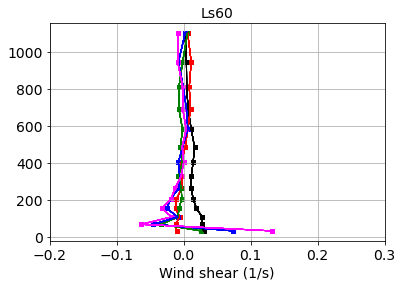

In [8]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
#let's zoom in on the lowest levels
#Let's plot all the Ri over the average range of x
plt.xlabel("Wind shear (1/s)")
#plt.ylabel("Height above surface (m)")
#Using a log10 scale for richardson number
#Ri can get very large if shear is small
plt.xscale('linear')
plt.xlim([-0.2,0.3])
#plt.xticks(range(0,2,1))   
for t in range(time1,time2):
    varx=np.average(shear[time1:time2,y2020,x2020,1:15],axis=0)
    vary=np.average(z_lyrbnd_AGL[time1:time2,y2020,x2020,1:15],axis=0)
    plt.scatter(varx,vary,marker='.',color='black',linewidth=2)
    plt.plot(varx,vary,color='black',linewidth=1)
for t in range(time2,time3):
    varx=np.average(shear[time2:time3,y2020,x2020,1:15],axis=0)
    vary=np.average(z_lyrbnd_AGL[time2:time3,y2020,x2020,1:15],axis=0)
    plt.scatter(varx,vary,marker='.',color='red',linewidth=2)
    plt.plot(varx,vary,color='red',linewidth=1)
for t in range(time3,time4):
    varx=np.average(shear[time3:time4,y2020,x2020,1:15],axis=0)
    vary=np.average(z_lyrbnd_AGL[time3:time4,y2020,x2020,1:15],axis=0)
    plt.scatter(varx,vary,marker='.',color='green',linewidth=2)
    plt.plot(varx,vary,color='green',linewidth=1)
for t in range(time4,time5):
    varx=np.average(shear[time4:time5,y2020,x2020,1:15],axis=0)
    vary=np.average(z_lyrbnd_AGL[time4:time5,y2020,x2020,1:15],axis=0)
    plt.scatter(varx,vary,marker='.',color='blue',linewidth=2)
    plt.plot(varx,vary,color='blue',linewidth=1)
for t in range(time5,time6):
    varx=np.average(shear[time5:time6,y2020,x2020,1:15],axis=0)
    vary=np.average(z_lyrbnd_AGL[time5:time6,y2020,x2020,1:15],axis=0)
    plt.scatter(varx,vary,marker='.',color='magenta',linewidth=2)
    plt.plot(varx,vary,color='magenta',linewidth=1)
plt.grid()
title='Ls60'
plt.title(title)
resolution_value = 1200
plt.savefig("shear_Ls60.png", format="png", dpi=resolution_value)

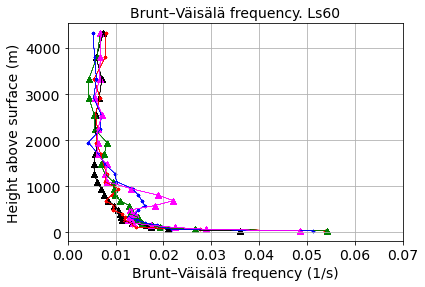

In [19]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
#let's zoom in on the lowest levels
#Let's plot all the Ri over the average range of x
plt.xlabel("Brunt–Väisälä frequency (1/s)")
plt.ylabel("Height above surface (m)")
#Using a log10 scale for richardson number
#Ri can get very large if shear is small
plt.xscale('linear')
plt.xlim([0.,0.07])
#plt.xticks(range(0,2,1))   
for t in range(time1,time2):
    varx=np.average(brunt[time1:time2,y2020,x2020,1:25],axis=0)
    vary=np.average(z_lyrbnd_AGL[time1:time2,y2020,x2020,1:25],axis=0)
    plt.scatter(varx,vary,marker='^',color='black',linewidth=0.1)
    plt.plot(varx,vary,color='black',linewidth=0.1)
for t in range(time2,time3):
    varx=np.average(brunt[time2:time3,y2020,x2020,1:25],axis=0)
    vary=np.average(z_lyrbnd_AGL[time2:time3,y2020,x2020,1:25],axis=0)
    plt.scatter(varx,vary,marker='.',color='red',linewidth=0.1)
    plt.plot(varx,vary,color='red',linewidth=0.1)
for t in range(time3,time4):
    varx=np.average(brunt[time3:time4,y2020,x2020,1:25],axis=0)
    vary=np.average(z_lyrbnd_AGL[time3:time4,y2020,x2020,1:25],axis=0)
    plt.scatter(varx,vary,marker='^',color='green',linewidth=0.1)
    plt.plot(varx,vary,color='green',linewidth=0.1)
for t in range(time4,time5):
    varx=np.average(brunt[time4:time5,y2020,x2020,1:25],axis=0)
    vary=np.average(z_lyrbnd_AGL[time4:time5,y2020,x2020,1:25],axis=0)
    plt.scatter(varx,vary,marker='.',color='blue',linewidth=0.1)
    plt.plot(varx,vary,color='blue',linewidth=0.1)
for t in range(time5,time6):
    varx=np.average(brunt[time5:time6,y2020,x2020,1:25],axis=0)
    vary=np.average(z_lyrbnd_AGL[time5:time6,y2020,x2020,1:25],axis=0)
    plt.scatter(varx,vary,marker='^',color='magenta',linewidth=0.1)
    plt.plot(varx,vary,color='magenta',linewidth=0.1)
plt.grid()
title='Brunt–Väisälä frequency. Ls60'
plt.title(title)
resolution_value = 1200
plt.savefig("BV_Ls60_test.png", format="png", dpi=resolution_value)

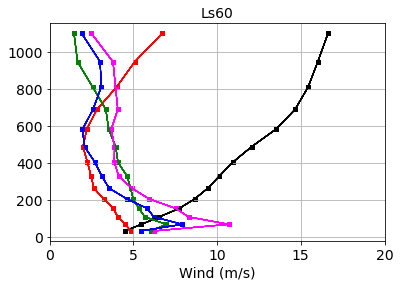

In [9]:
SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 20
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)  # fontsize of the figure title
#let's zoom in on the lowest levels
#Let's plot all the Ri over the average range of x
plt.xlabel("Wind (m/s)")
#plt.ylabel("Height above surface (m)")
#Using a log10 scale for richardson number
#Ri can get very large if shear is small
plt.xscale('linear')
plt.xlim([0,20])
#plt.xticks(range(0,2,1))   
for t in range(time1,time2):
    varx=np.average(speed[time1:time2,y2020,x2020,1:15],axis=0)
    vary=np.average(z_lyrbnd_AGL[time1:time2,y2020,x2020,1:15],axis=0)
    plt.scatter(varx,vary,marker='.',color='black',linewidth=2)
    plt.plot(varx,vary,color='black',linewidth=1)
for t in range(time2,time3):
    varx=np.average(speed[time2:time3,y2020,x2020,1:15],axis=0)
    vary=np.average(z_lyrbnd_AGL[time2:time3,y2020,x2020,1:15],axis=0)
    plt.scatter(varx,vary,marker='.',color='red',linewidth=2)
    plt.plot(varx,vary,color='red',linewidth=1)
for t in range(time3,time4):
    varx=np.average(speed[time3:time4,y2020,x2020,1:15],axis=0)
    vary=np.average(z_lyrbnd_AGL[time3:time4,y2020,x2020,1:15],axis=0)
    plt.scatter(varx,vary,marker='.',color='green',linewidth=2)
    plt.plot(varx,vary,color='green',linewidth=1)
for t in range(time4,time5):
    varx=np.average(speed[time4:time5,y2020,x2020,1:15],axis=0)
    vary=np.average(z_lyrbnd_AGL[time4:time5,y2020,x2020,1:15],axis=0)
    plt.scatter(varx,vary,marker='.',color='blue',linewidth=2)
    plt.plot(varx,vary,color='blue',linewidth=1)
for t in range(time5,time6):
    varx=np.average(speed[time5:time6,y2020,x2020,1:15],axis=0)
    vary=np.average(z_lyrbnd_AGL[time5:time6,y2020,x2020,1:15],axis=0)
    plt.scatter(varx,vary,marker='.',color='magenta',linewidth=2)
    plt.plot(varx,vary,color='magenta',linewidth=1)
plt.grid()
title='Ls60'
plt.title(title)
resolution_value = 1200
plt.savefig("Wind_Ls60.png", format="png", dpi=resolution_value)